In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BigData/DataScience_salaries_2024 (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary_currency     14838 non-null  object
 5   salary_in_usd       14838 non-null  int64 
 6   employee_residence  14838 non-null  object
 7   remote_ratio        14838 non-null  int64 
 8   company_location    14838 non-null  object
 9   company_size        14838 non-null  object
 10  salary              14838 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [ ]:
duplicates = df[df.duplicated]  # Lấy tất cả các bản ghi trùng lặp

if not duplicates.empty:
    print("Các bản ghi trùng lặp:")
    print(duplicates)
else:
    print("Không có bản ghi trùng lặp.")

Các bản ghi trùng lặp:
       work_year experience_level employment_type                   job_title  \
72          2024               MI              FT  Machine Learning Scientist   
84          2024               MI              FT           Research Engineer   
93          2024               SE              FT   Machine Learning Engineer   
97          2024               SE              FT          Research Scientist   
105         2024               MI              FT           Research Engineer   
...          ...              ...             ...                         ...   
14787       2022               MI              FT               Data Engineer   
14792       2024               EN              FT                Data Analyst   
14793       2024               EN              FT                Data Analyst   
14794       2024               EN              FT                Data Analyst   
14796       2023               EN              FT                Data Analyst   

    

In [ ]:
data = df.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9127 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9127 non-null   int64 
 1   experience_level    9127 non-null   object
 2   employment_type     9127 non-null   object
 3   job_title           9127 non-null   object
 4   salary_currency     9127 non-null   object
 5   salary_in_usd       9127 non-null   int64 
 6   employee_residence  9127 non-null   object
 7   remote_ratio        9127 non-null   int64 
 8   company_location    9127 non-null   object
 9   company_size        9127 non-null   object
 10  salary              9127 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 855.7+ KB


In [ ]:
data['salary_in_usd'] = data.groupby(['work_year','job_title', 'experience_level', 'employment_type', 'salary_currency', 'company_location', 'company_size','remote_ratio','employee_residence',])['salary_in_usd'].transform('mean')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9127 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9127 non-null   int64  
 1   experience_level    9127 non-null   object 
 2   employment_type     9127 non-null   object 
 3   job_title           9127 non-null   object 
 4   salary_currency     9127 non-null   object 
 5   salary_in_usd       9127 non-null   float64
 6   employee_residence  9127 non-null   object 
 7   remote_ratio        9127 non-null   int64  
 8   company_location    9127 non-null   object 
 9   company_size        9127 non-null   object 
 10  salary              9127 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 855.7+ KB


<ipython-input-6-da95b603b96e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary_in_usd'] = data.groupby(['work_year','job_title', 'experience_level', 'employment_type', 'salary_currency', 'company_location', 'company_size','remote_ratio','employee_residence',],)['salary_in_usd'].transform('mean')


In [ ]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9127 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9127 non-null   int64  
 1   experience_level    9127 non-null   object 
 2   employment_type     9127 non-null   object 
 3   job_title           9127 non-null   object 
 4   salary_currency     9127 non-null   object 
 5   salary_in_usd       9127 non-null   float64
 6   employee_residence  9127 non-null   object 
 7   remote_ratio        9127 non-null   int64  
 8   company_location    9127 non-null   object 
 9   company_size        9127 non-null   object 
 10  salary              9127 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 855.7+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['work_year','experience_level', 'job_title', 'employment_type', 'company_size','salary_currency','employee_residence','remote_ratio','company_location']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = ['work_year','experience_level', 'job_title', 'employment_type', 'company_size','salary_currency','employee_residence','remote_ratio','company_location']
target = 'salary_in_usd'

# Tách dữ liệu đầu vào và đầu ra
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo pipeline với Hồi quy tuyến tính
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 653788823.614863
R-squared: 0.7416235638157551
Mean Absolute Error: 14322.77306417248


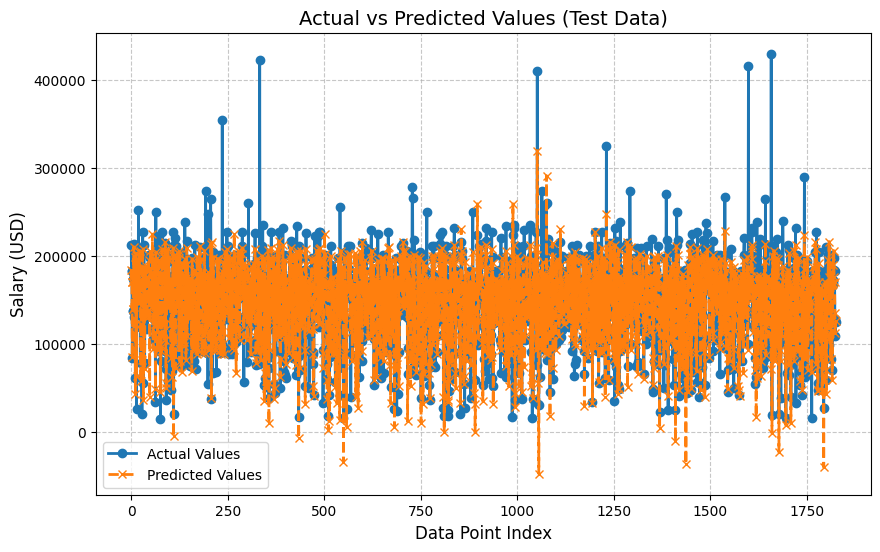

In [ ]:
# Vẽ đồ thị hiển thị giá trị thực tế và giá trị dự đoán sau khi test
plt.figure(figsize=(10, 6))

# Xác định số điểm dữ liệu để biểu diễn
data_points = np.arange(len(y_test))

# Vẽ giá trị thực tế (Actual)
plt.plot(data_points, y_test.values, label='Actual Values', marker='o', linestyle='-', linewidth=2)

# Vẽ giá trị dự đoán (Predicted)
plt.plot(data_points, y_pred, label='Predicted Values', marker='x', linestyle='--', linewidth=2)

# Cài đặt tiêu đề, nhãn và chú thích
plt.title('Actual vs Predicted Values (Test Data)', fontsize=14)
plt.xlabel('Data Point Index', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()
